Numerical solver for a single degree of freedom system with viscous damping, using a Rounge Kutta routinebuilt in scipy

In [1]:
# Import neccesary modules

from math import sqrt, pi, exp
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


In [7]:
# Define system parameters

m = 1
k = 1
zeta = 0.05
F = 0          # External force magnitude, leave it as zero for free vibration
omega = 2      # External force frequency, leave it as zero for free vibration

# Calculate natural frequency and damping ratio

omega_n=sqrt(k/m)

In [8]:


# Main solver using state space equations

def dU_dx(U, x):
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [U[1], -2*zeta*omega_n*U[1] - omega_n**2*U[0] + F*np.cos(omega*x)]


U0 = [1, 0]              # This is the vector of initial conditions, could be zero if there is an external force

# ts is the time vector

ts = np.linspace(0, 50, 200)
Us = odeint(dU_dx, U0, ts)

# Extract displacement and velocity from solution

yd = Us[:,0]
yv = Us[:,1]




(0.0, 50.0)

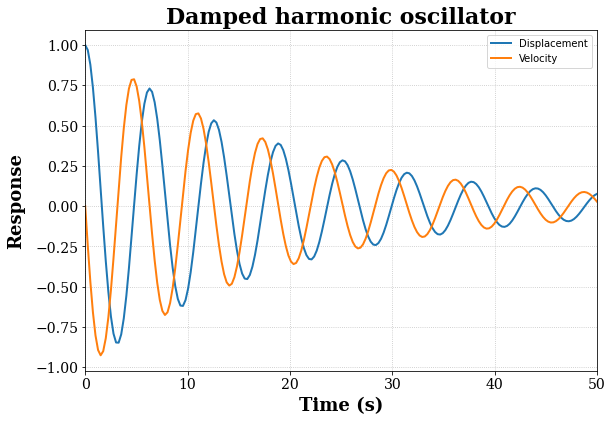

In [9]:
# Plot results

# Set format for figure and plot the results

# Set the plot size 
fig = plt.figure(figsize=(9, 6))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Modify the axis units
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=14)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=14)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Activate and edit the grid
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=18, weight='bold', labelpad=5)
plt.ylabel('Response', family='serif', fontsize=18, weight='bold', labelpad=10)
plt.title("Damped harmonic oscillator",  family='serif', fontsize=22, weight='bold')


# plot the response


plt.plot(ts, yd, linewidth=2, linestyle = '-', label=r'Displacement')    # Plot displacement
plt.plot(ts, yv, linewidth=2, linestyle = '-', label=r'Velocity')    # Plot velocity
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)


# Set axis limits
plt.xlim(0,50)
#plt.ylim(-2,2)

